In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and creating a dataframe

In [19]:
df = pd.read_csv('survey_data.csv')
df.head(1)



,IP,Submission ID,Submission Date,Please select your membership level:,Over the last few years did you upgrade or downgrade your membership level to your current membership?,"If you remember, please note your previous membership level",When did you first join NAHP/FDH/FDHPM?,What other memberships do you have?,"Are you a full-time professional papermaker, artist, paper/book conservator, or librarian, or are you engaged in other professions?",How would you describe your age:,...,"How do you get most of your information about potential conferences, exhibitions, and other opportunities on papermaking?",Indicate which one.,"Have you ever received any recognition from NAHP like scholarships, grants, presentation, exhibitions, etc.? If so, please mention which ones.","Have you ever received any recognition from NAHP like scholarships, grants, presentation, exhibitions, etc.? If so, please note which ones.",How often do you check the website for information?,Do you find the information you need,What information do you usually look for on NAHP's website,Is there anything else you would like to add?,"Would you be interested in being contacted to volunteer on one of the following committees? We can’t promise you’ll get this assignment, but we will share with the appropriate officer or committee chair.",Please note your email address if you want to be contacted.
0,2601:1c0:5f00:14a0:9539:5cbe:3abe:3213,5930157213123106901,05-31-2024 21:48:41,Individual,"No, never changed",NaN,01/15/1992 (?),NaN,Full-time,70s,...,"Email blasts; Print publications, newsletters,...",NaN,NaN,Exhibition participant; Volunteer on a committ...,Weekly,Yes,Conference; Exhibitions,I’d just add that I appreciate the hard work a...,NaN,NaN


In [20]:
# Removing the Columns that are not importat to analize

df = df.drop(['IP', 'Submission ID'], axis=1)
df.head()

,Submission Date,Please select your membership level:,Over the last few years did you upgrade or downgrade your membership level to your current membership?,"If you remember, please note your previous membership level",When did you first join NAHP/FDH/FDHPM?,What other memberships do you have?,"Are you a full-time professional papermaker, artist, paper/book conservator, or librarian, or are you engaged in other professions?",How would you describe your age:,What country do you live in?,"If United States, please select your state:",...,"How do you get most of your information about potential conferences, exhibitions, and other opportunities on papermaking?",Indicate which one.,"Have you ever received any recognition from NAHP like scholarships, grants, presentation, exhibitions, etc.? If so, please mention which ones.","Have you ever received any recognition from NAHP like scholarships, grants, presentation, exhibitions, etc.? If so, please note which ones.",How often do you check the website for information?,Do you find the information you need,What information do you usually look for on NAHP's website,Is there anything else you would like to add?,"Would you be interested in being contacted to volunteer on one of the following committees? We can’t promise you’ll get this assignment, but we will share with the appropriate officer or committee chair.",Please note your email address if you want to be contacted.
0,05-31-2024 21:48:41,Individual,"No, never changed",NaN,01/15/1992 (?),NaN,Full-time,70s,United States,Oregon,...,"Email blasts; Print publications, newsletters,...",NaN,NaN,Exhibition participant; Volunteer on a committ...,Weekly,Yes,Conference; Exhibitions,I’d just add that I appreciate the hard work a...,NaN,NaN
1,05-31-2024 16:11:01,Individual,"No, never changed",NaN,01/01/2019,"IAPMA; Textile Society of America, Surface Des...",Other profession(s),40s,United States,California,...,"Personal contacts; Social media: Instagram, Fa...",NaN,No,NaN,Before an event,Sometimes,Conference; Exhibitions; Grants/Scholarships,I would love to see more diversity in the arti...,NaN,NaN
2,05-30-2024 09:41:54,Individual,"No, never changed",NaN,01/2020,IAPMA,Full-time,40s,Canada,NaN,...,"Personal contacts; Print publications, newslet...",NaN,I was part of the curated members' exhibition ...,Exhibition participant,Before an event,Yes,Conference; Exhibitions,NaN,NaN,NaN
3,05-29-2024 13:52:28,Individual,"No, never changed",NaN,2010,IAPMA; CPC (Colorado Paper Collective),Full-time,60s,United States,Colorado,...,"Personal contacts; Print publications, newslet...",instagram,NaN,Exhibition participant,Quarterly,Sometimes,Conference; Exhibitions,NaN,NaN,NaN
4,05-29-2024 10:28:37,Individual,"No, never changed",NaN,1990,IAPMA,Full-time,60s,United States,Iowa,...,Email blasts,NaN,NaN,NaN,Quarterly,Yes,Conference; Exhibitions,NaN,NaN,NaN


# Country Column Analisis 

Top three countries represented in the dataset:
What country do you live in?
United States    118
Canada             6
Germany            3
Name: count, dtype: int64


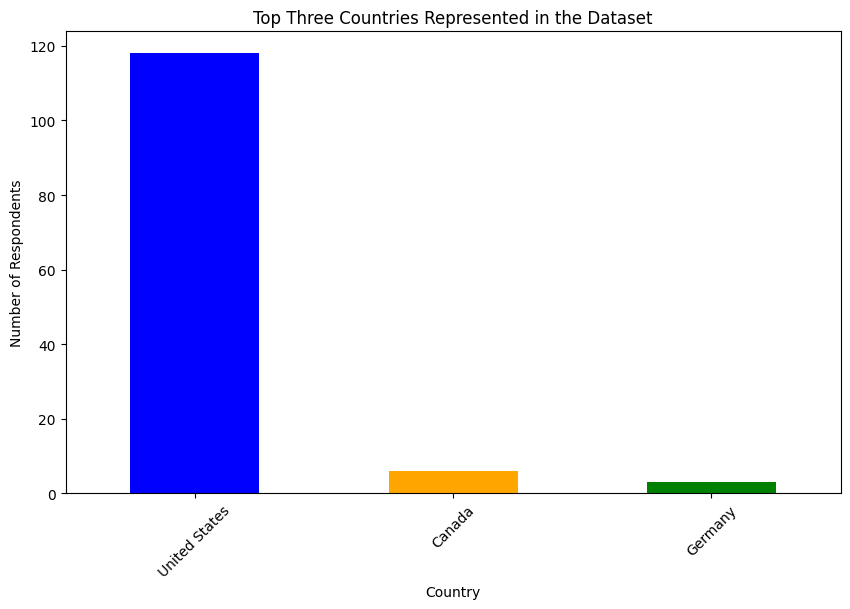

Top three countries represented in the dataset:
What country do you live in?
United States    118
Canada             6
Germany            3
Name: count, dtype: int64


In [21]:
# Count the number of respondents from each country
country_counts = df['What country do you live in?'].value_counts()

# Get the top three countries
top_countries = country_counts.head(3)

print('Top three countries represented in the dataset:')
print(top_countries)

# Get the top three countries
top_countries = country_counts.head(3)

# Plot the data
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Top Three Countries Represented in the Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

print('Top three countries represented in the dataset:')
print(top_countries)

In [22]:
# Breakdown of respondents by profession in each of the top three countries

# Filter the dataframe for the top three countries
filtered_df = df[df['What country do you live in?'].isin(top_countries.index)]

# Group by country and profession, then count the number of respondents
profession_counts = filtered_df.groupby(['What country do you live in?', 'Are you a full-time professional papermaker, artist, paper/book conservator, or librarian, or are you engaged in other professions?']).size().unstack().fillna(0)

print(profession_counts)

Are you a full-time professional papermaker, artist, paper/book conservator, or librarian, or are you engaged in other professions?  Full-time  \
What country do you live in?                                                                                                                     
Canada                                                                                                                                     3.0   
Germany                                                                                                                                    0.0   
United States                                                                                                                             65.0   

Are you a full-time professional papermaker, artist, paper/book conservator, or librarian, or are you engaged in other professions?  Other profession(s)  
What country do you live in?                                                                                      

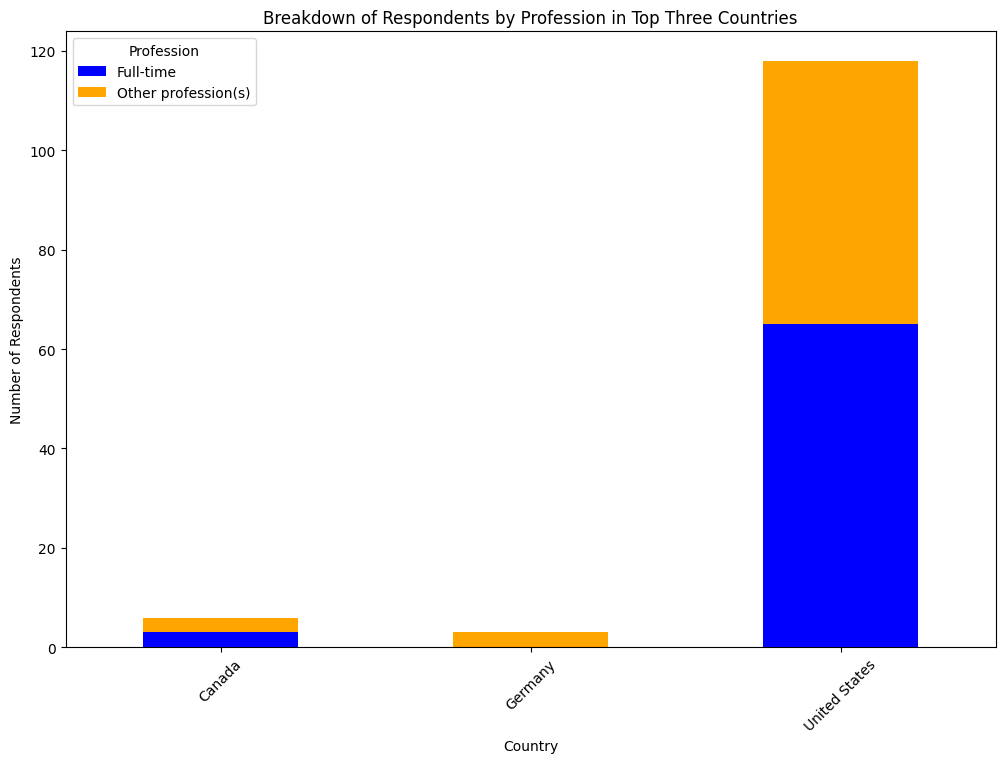

In [23]:
# Plot the breakdown of respondents by profession in each of the top three countries

profession_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'orange'])
plt.title('Breakdown of Respondents by Profession in Top Three Countries')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Profession')
plt.show()

# Membership Analitics

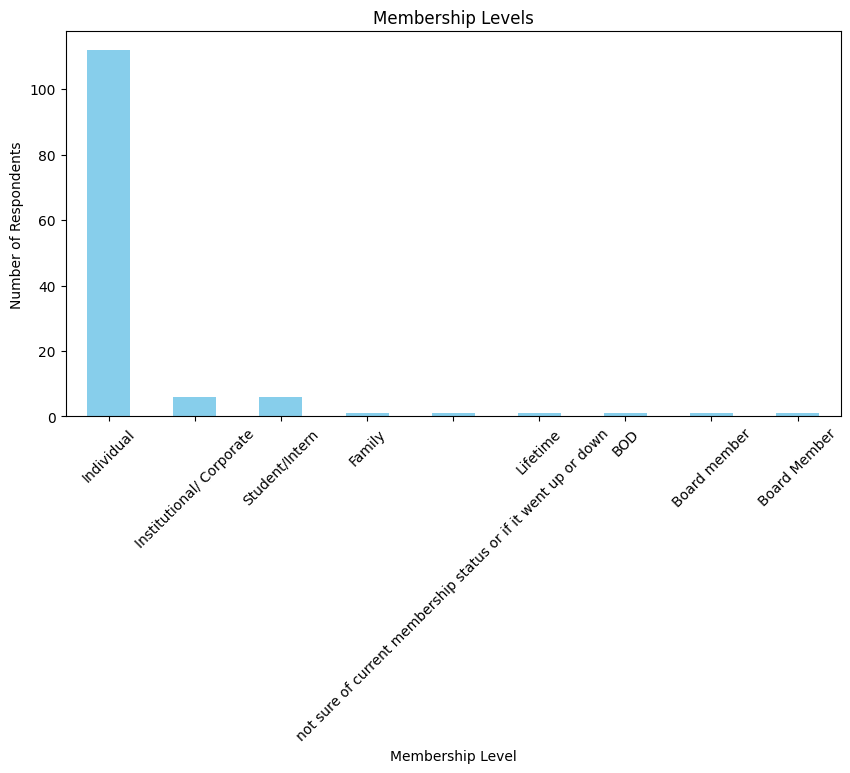

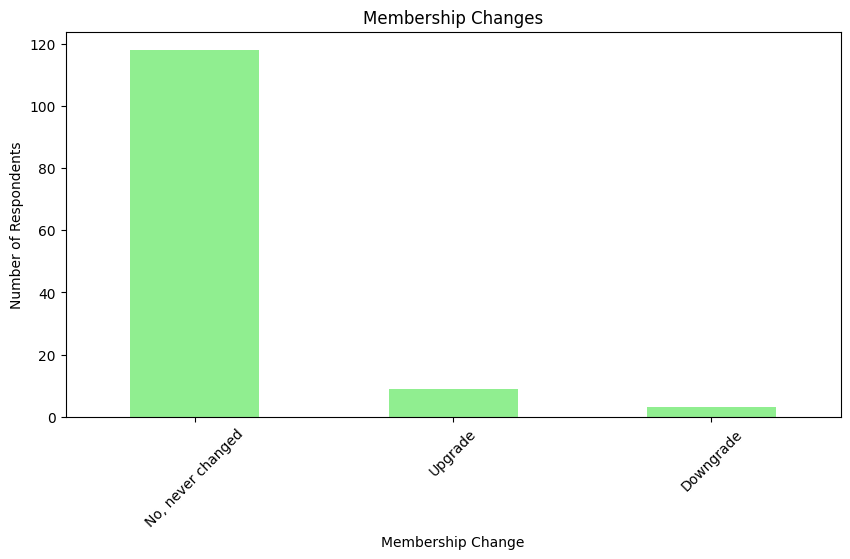

In [24]:
# Rename columns for easier access
membership_level_col = 'Please select your membership level:'
membership_change_col = 'Over the last few years did you upgrade or downgrade your membership level to your current membership?'

# Count the membership levels
membership_counts = df[membership_level_col].value_counts()

# Count the membership changes
membership_changes = df[membership_change_col].value_counts()

# Plot the membership levels
plt.figure(figsize=(10, 5))
membership_counts.plot(kind='bar', color='skyblue')
plt.title('Membership Levels')
plt.xlabel('Membership Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

# Plot the membership changes
plt.figure(figsize=(10, 5))
membership_changes.plot(kind='bar', color='lightgreen')
plt.title('Membership Changes')
plt.xlabel('Membership Change')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


/var/folders/dh/bqv60b914lx1zjhz7c0v7t780000gn/T/ipykernel_2327/3790817968.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profession_counts.values, y=profession_counts.index, palette='viridis')


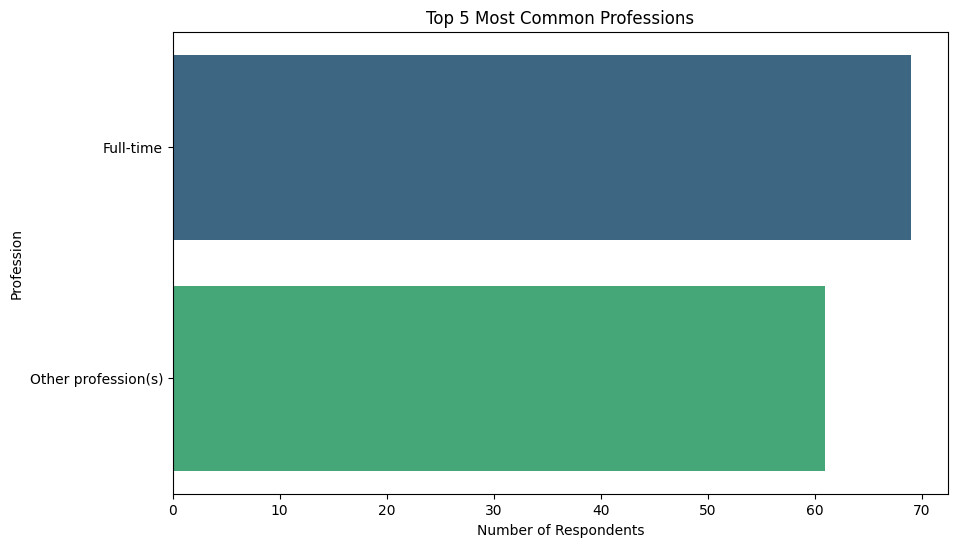

/var/folders/dh/bqv60b914lx1zjhz7c0v7t780000gn/T/ipykernel_2327/3790817968.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.values, y=age_counts.index, palette='viridis')


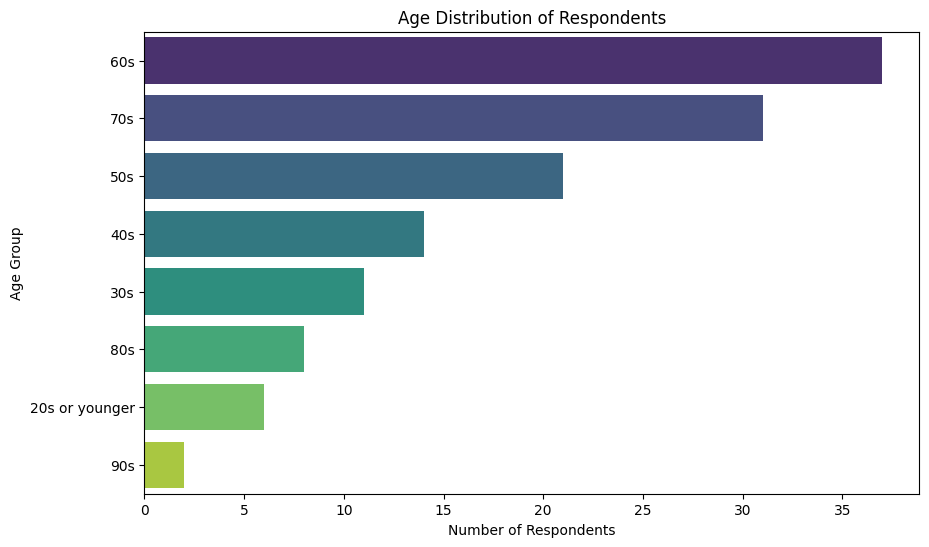

In [25]:
# Count the professions and age groups
profession_col = 'Are you a full-time professional papermaker, artist, paper/book conservator, or librarian, or are you engaged in other professions?'
age_col = 'How would you describe your age:'

df.columns = [col.strip() for col in df.columns]

# Count the occurrences of each profession
profession_counts = df['Are you a full-time professional papermaker, artist, paper/book conservator, or librarian, or are you engaged in other professions?'].value_counts().head(5)

# Plot the profession distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=profession_counts.values, y=profession_counts.index, palette='viridis')
plt.title('Top 5 Most Common Professions')
plt.xlabel('Number of Respondents')
plt.ylabel('Profession')
plt.show()

# Count the occurrences of each age group
age_counts = df['How would you describe your age:'].value_counts()

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.values, y=age_counts.index, palette='viridis')
plt.title('Age Distribution of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Age Group')
plt.show()

/var/folders/dh/bqv60b914lx1zjhz7c0v7t780000gn/T/ipykernel_2327/2511785901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Participation', y='Count', data=participation_df, palette='viridis')


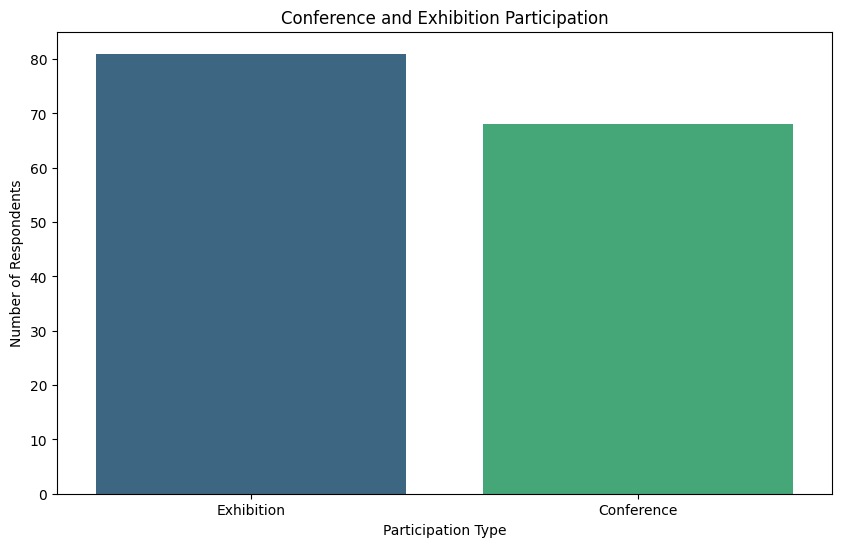

/var/folders/dh/bqv60b914lx1zjhz7c0v7t780000gn/T/ipykernel_2327/2511785901.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reasons', y='Count', data=reasons_df, palette='viridis')


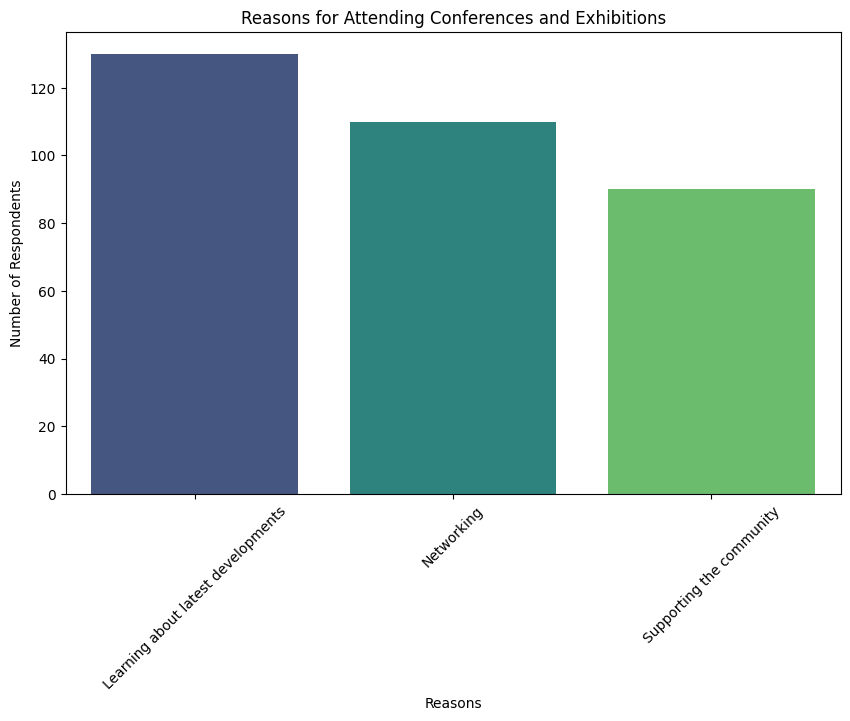

In [26]:
participation_data = {'Participation': ['Exhibition', 'Conference'], 'Count': [81, 68]}

# Create a DataFrame
participation_df = pd.DataFrame(participation_data)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Participation', y='Count', data=participation_df, palette='viridis')
plt.title('Conference and Exhibition Participation')
plt.xlabel('Participation Type')
plt.ylabel('Number of Respondents')
plt.show()

# Reasons for attending conferences and exhibitions
reasons_data = {'Reasons': ['Learning about latest developments', 'Networking', 'Supporting the community'], 'Count': [130, 110, 90]}

# Create a DataFrame
reasons_df = pd.DataFrame(reasons_data)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Reasons', y='Count', data=reasons_df, palette='viridis')
plt.title('Reasons for Attending Conferences and Exhibitions')
plt.xlabel('Reasons')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Correcting column names based on the list provided
demographics_columns_corrected = [
    'When did you first join NAHP/FDH/FDHPM?',
    'How would you describe your age:',
    'Have you ever participated in an NAHP exhibition?',
    'How often do you try to attend NAHP conferences?'
]

# Filter the data to include only these columns
demographics_data_corrected = df[demographics_columns_corrected]

# Clean the data by renaming columns for better readability and handling any missing values
demographics_data_corrected.columns = [
    'Join_Date', 
    'Age', 
    'Participate_Exhibitions', 
    'Attend_Conferences'
]

# Drop rows with missing values in the key columns for this analysis
demographics_data_corrected.dropna(subset=['Age', 'Participate_Exhibitions', 'Attend_Conferences'], inplace=True)

# Generate summary statistics and visualizations
demographics_summary_corrected = demographics_data_corrected.describe(include='all')
demographics_summary_corrected

/var/folders/dh/bqv60b914lx1zjhz7c0v7t780000gn/T/ipykernel_2327/15840613.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_data_corrected.dropna(subset=['Age', 'Participate_Exhibitions', 'Attend_Conferences'], inplace=True)


,Join_Date,Age,Participate_Exhibitions,Attend_Conferences
count,130,130,130,130
unique,111,8,3,6
top,2018,60s,Yes,Whenever I can
freq,4,37,62,40


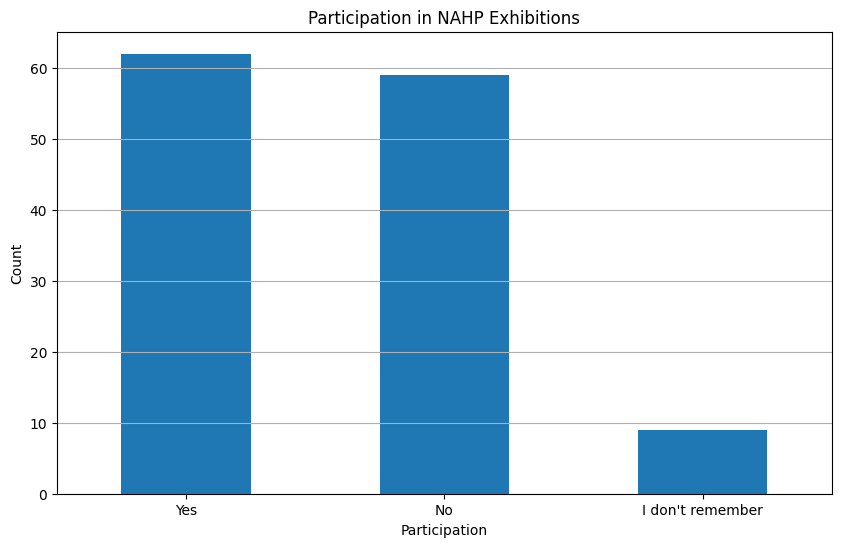

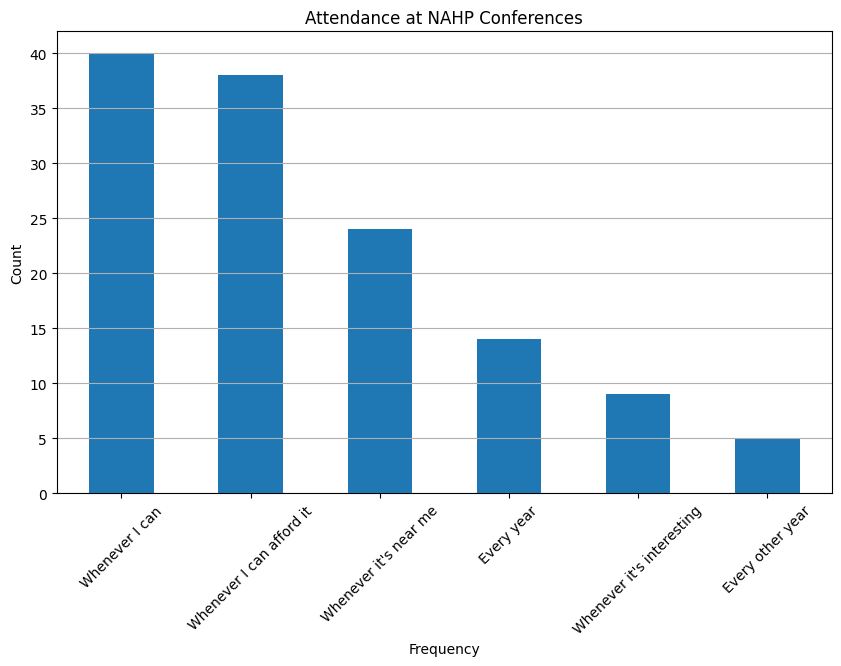

In [28]:
# Participation in exhibitions
plt.figure(figsize=(10, 6))
demographics_data_corrected['Participate_Exhibitions'].value_counts().plot(kind='bar')
plt.title('Participation in NAHP Exhibitions')
plt.xlabel('Participation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Attendance at conferences
plt.figure(figsize=(10, 6))
demographics_data_corrected['Attend_Conferences'].value_counts().plot(kind='bar')
plt.title('Attendance at NAHP Conferences')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

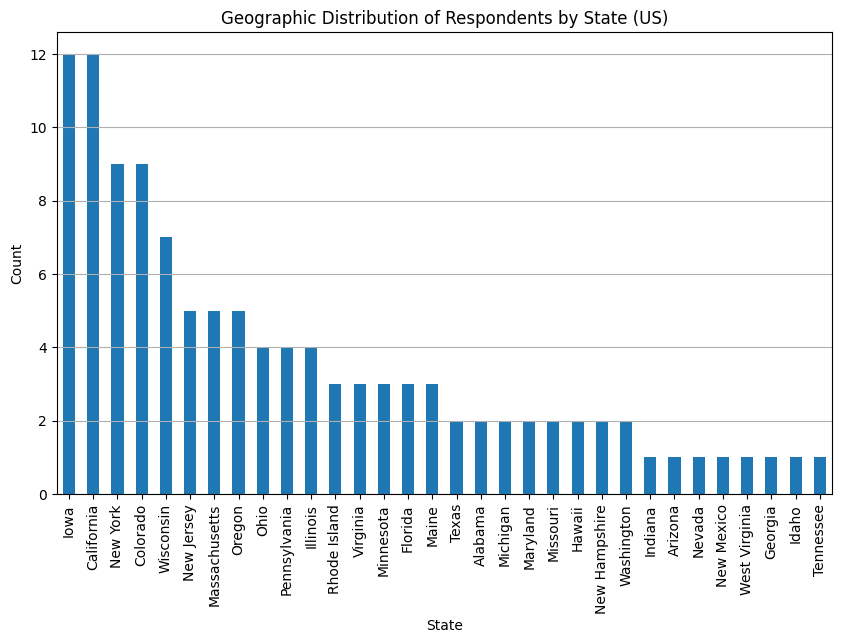

In [29]:
# 4. Geographic Distribution
geographic_distribution_country = df['What country do you live in?'].value_counts()
geographic_distribution_state = df['If United States, please select your state:'].value_counts()


# Geographic Distribution - State (for US respondents)
plt.figure(figsize=(10, 6))
geographic_distribution_state.plot(kind='bar')
plt.title('Geographic Distribution of Respondents by State (US)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

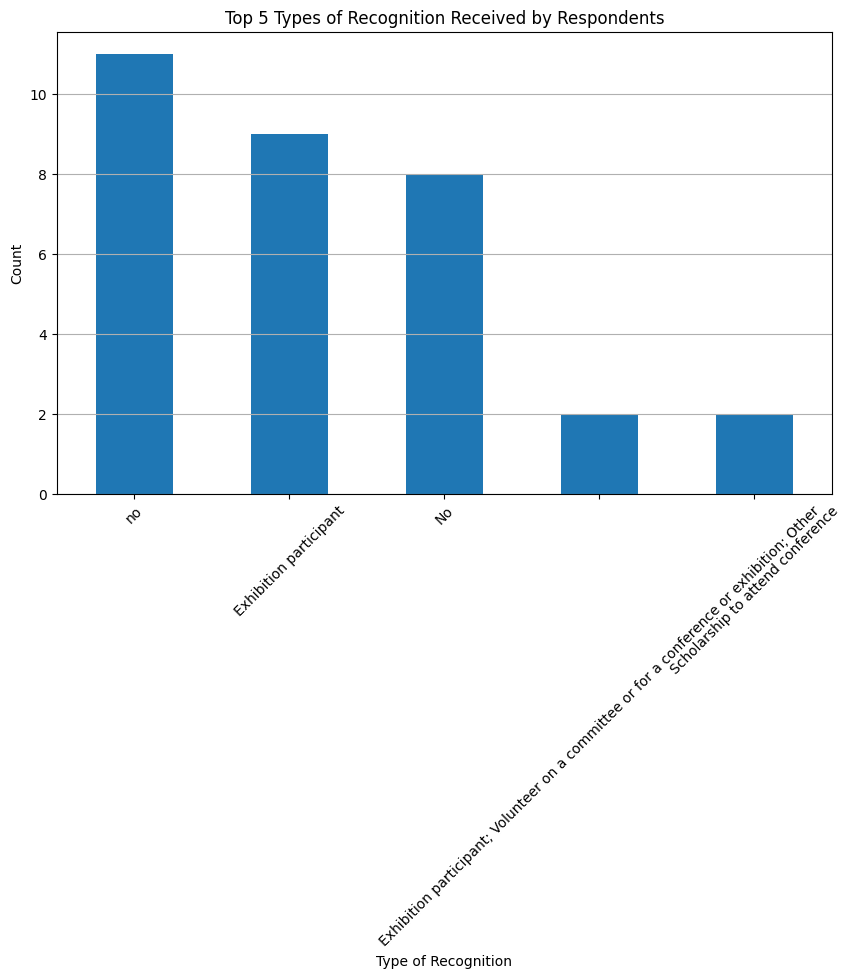

In [30]:
# Analyzing the top 5 types of recognition received

# Extracting the columns related to recognition and awards
recognition_columns = [
    'Have you ever received any recognition from NAHP like scholarships, grants, presentation, exhibitions, etc.? If so, please mention which ones.',
    'Have you ever received any recognition from NAHP like scholarships, grants, presentation, exhibitions, etc.? If so, please note which ones.'
]

# Filter the data to include only these columns
recognition_data = df[recognition_columns]

# Clean the data by combining the recognition columns into one
recognition_data_combined = recognition_data.apply(lambda x: ' '.join(x.dropna()), axis=1)
recognition_data_combined = recognition_data_combined[recognition_data_combined != '']

# Analyzing the types of recognition received
recognition_types = recognition_data_combined.value_counts().head(5)

# Creating a visualization for the top 5 types of recognition
plt.figure(figsize=(10, 6))
recognition_types.plot(kind='bar')
plt.title('Top 5 Types of Recognition Received by Respondents')
plt.xlabel('Type of Recognition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


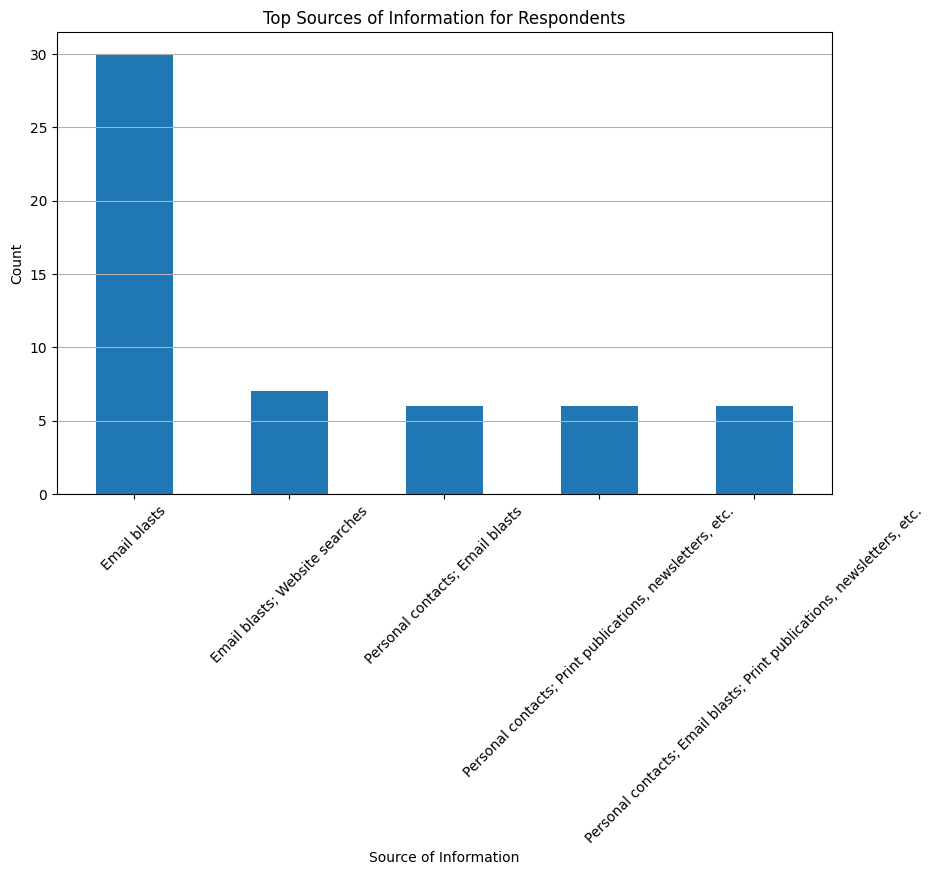

In [31]:
# Analyzing Information Sources

# Extracting the columns related to information sources
info_sources_columns = [
    'How do you get most of your information about potential conferences, exhibitions, and other opportunities on papermaking?',
    'Indicate which one.'
]

# Filter the data to include only these columns
info_sources_data = df[info_sources_columns]

# Clean the data by combining the information source columns into one
info_sources_data_combined = info_sources_data.apply(lambda x: ' '.join(x.dropna()), axis=1)
info_sources_data_combined = info_sources_data_combined[info_sources_data_combined != '']

# Analyzing the sources of information
info_sources_types = info_sources_data_combined.value_counts()

# Creating a visualization for the sources of information
plt.figure(figsize=(10, 6))
info_sources_types.head(5).plot(kind='bar')
plt.title('Top Sources of Information for Respondents')
plt.xlabel('Source of Information')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


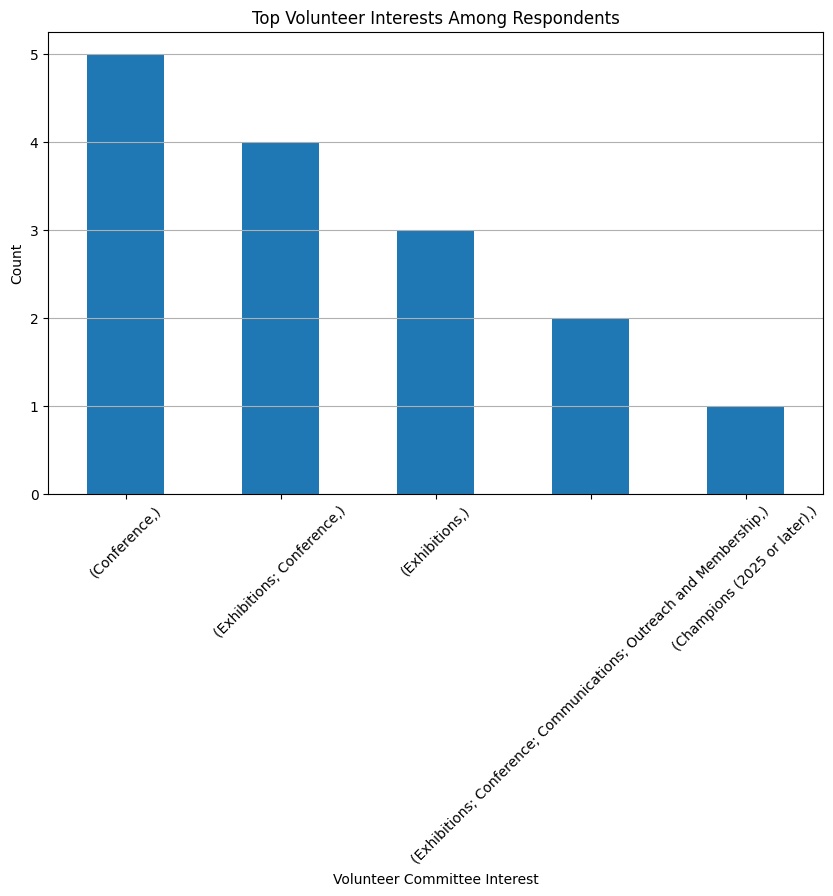

In [32]:
# Analyzing Volunteer Interests

# Extracting the columns related to volunteer interests
volunteer_columns = [
    'Would you be interested in being contacted to volunteer on one of the following committees? We can’t promise you’ll get this assignment, but we will share with the appropriate officer or committee chair.'
]

# Filter the data to include only these columns
volunteer_data = df[volunteer_columns]

# Cleaning the data
volunteer_data_cleaned = volunteer_data.dropna().value_counts()

# Creating a visualization for volunteer interests
plt.figure(figsize=(10, 6))
volunteer_data_cleaned.head(5).plot(kind='bar')
plt.title('Top Volunteer Interests Among Respondents')
plt.xlabel('Volunteer Committee Interest')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
